### 질병별 평균 '내원일수'

In [ ]:
# # 코랩 한글폰트 깨짐 방지   >> 실행후, 런타임 다시시작 후, 아래 cell 실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 그리기용 import
import cufflinks as cf
cf.go_offline(connected=True)
from plotly.offline import iplot, init_notebook_mode

# 폰트 지정
plt.rc('font', family='NanumBarunGothic') 

pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/산대특 Project/마지막프로젝트/raw_data.csv', index_col=0)

In [ ]:
# 성별구분    라벨인코딩: '남' : 0, '여' : 1, 계' : 2 
# 연령구분5세 라벨인코딩: '005세미만': 0, '05_9세': 1, '10_14세': 2, '15_19세': 3, '20_24세': 4, '25_29세' : 5, '30_34세' : 6, '35_39세' : 7, '40_44세' : 8, '45_49세' : 9, '50_54세' : 10, 
#                         '55_59세' : 11, '60_64세' : 12, '65_69세': 13, '70_74세': 14, '75_79세' : 15, '80세이상' : 16, '계': 17, '소계' : 18, 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41510 entries, 0 to 41509
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   항목        41510 non-null  object
 1   성별구분      41510 non-null  int64 
 2   연령구분5세    41510 non-null  int64 
 3   환자수       41510 non-null  int64 
 4   내원일수      41510 non-null  int64 
 5   청구건수      41510 non-null  int64 
 6   요양급여비용총액  41510 non-null  int64 
 7   보험자부담금    41510 non-null  int64 
 8   본인부담금     41510 non-null  int64 
 9   연도        41510 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [3]:
df_total = df[(df['성별구분']==2) & (df['연령구분5세'] == 17)]
# df_total['항목'].value_counts()  
# len(df_total)

In [4]:
# 평균내원일수 column 생성
df_total['평균내원일수'] = 0
df_total['평균내원일수'] = df_total['내원일수'] / df_total['환자수']

In [5]:
df_total

,항목,성별구분,연령구분5세,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,본인부담금,연도,평균내원일수
0,난청,2,17,548913,1159130,1108228,76405654,50910783,25494871,2017,2.111683
37,녹내장,2,17,873977,2603339,2603142,129019223,81207879,47811344,2017,2.978727
74,뇌수막염,2,17,11958,67392,20414,14303185,11128646,3174539,2017,5.635725
111,뇌전증,2,17,143283,962209,708259,102268149,74375775,27892374,2017,6.715444
148,뇌졸중,2,17,577689,13298564,3119329,1680630512,1320875132,359755380,2017,23.020283
...,...,...,...,...,...,...,...,...,...,...,...
41325,환경성질환_천식,2,17,678150,2335703,2119244,101118901,68267462,32851439,2021,3.444228
41362,황반변성,2,17,367463,1216417,1188291,268522612,218482123,50040489,2021,3.310312
41399,후두염,2,17,1768494,3571125,3529080,89390373,65833031,23557342,2021,2.019303
41436,흉부대동맥류,2,17,22543,147773,73596,106060326,92995819,13064507,2021,6.555161


In [6]:
# 년도별, 평균내원일수 top extraction
df2017 = df_total[df_total['연도'] == 2017].sort_values(by='평균내원일수', ascending = False).head(10)
df2018 = df_total[df_total['연도'] == 2018].sort_values(by='평균내원일수', ascending = False).head(10)
df2019 = df_total[df_total['연도'] == 2019].sort_values(by='평균내원일수', ascending = False).head(10)
df2020 = df_total[df_total['연도'] == 2020].sort_values(by='평균내원일수', ascending = False).head(10)
df2021 = df_total[df_total['연도'] == 2021].sort_values(by='평균내원일수', ascending = False).head(10)

내원일수 top10 graph

In [7]:
import matplotlib.pyplot as plt

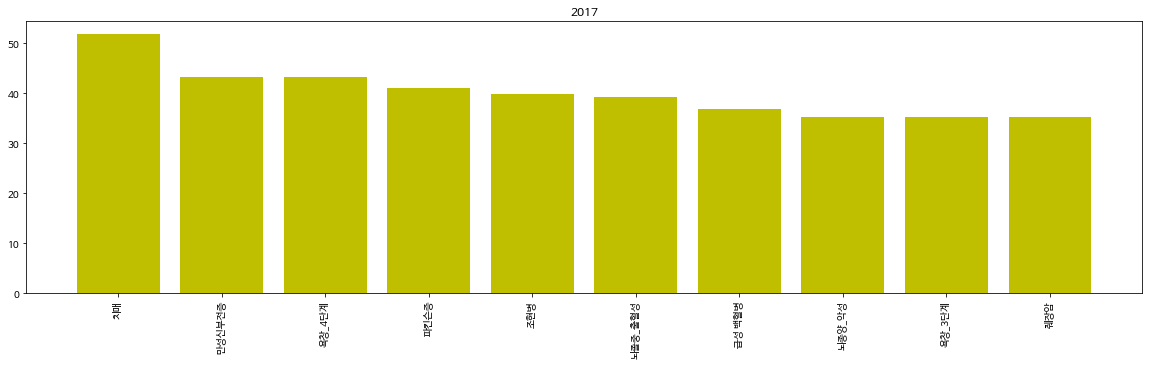

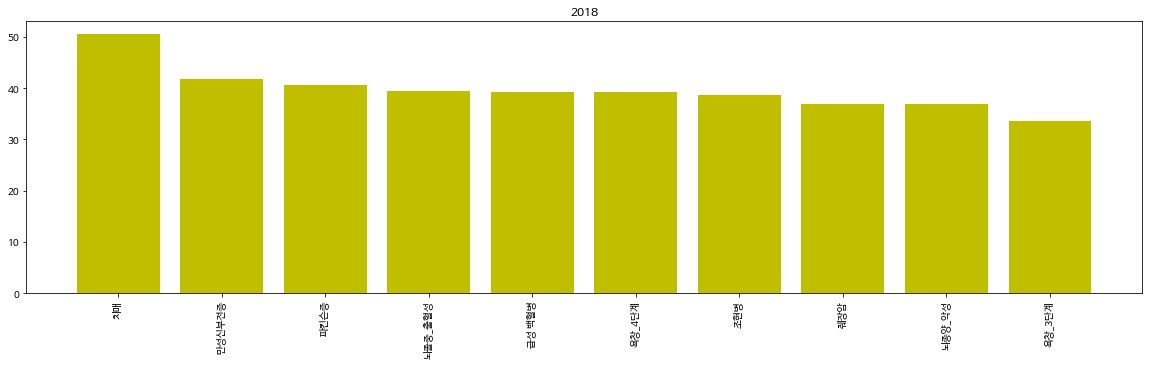

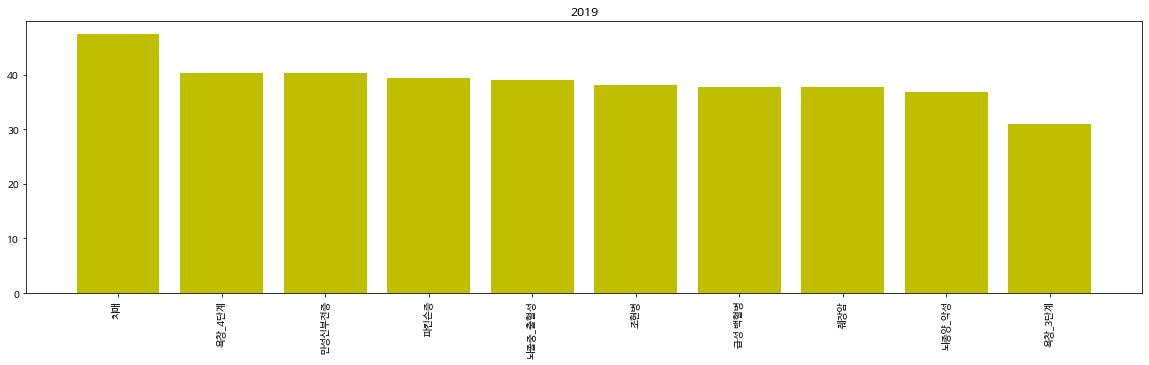

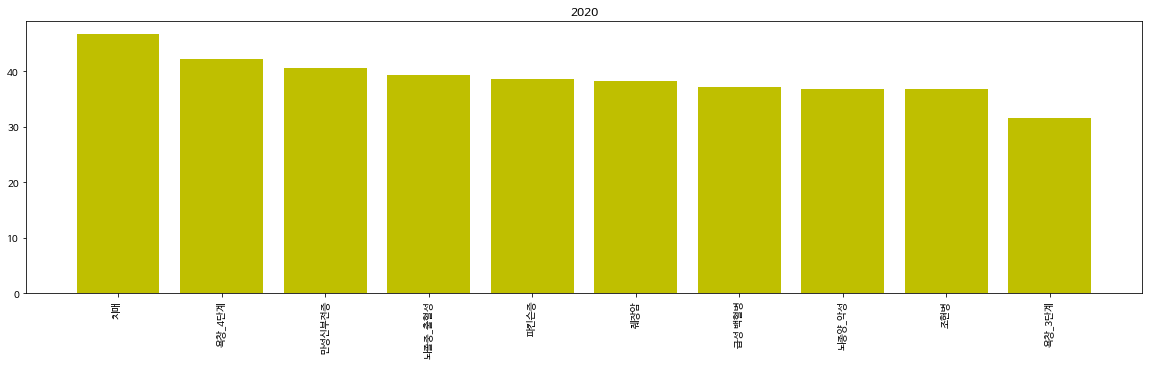

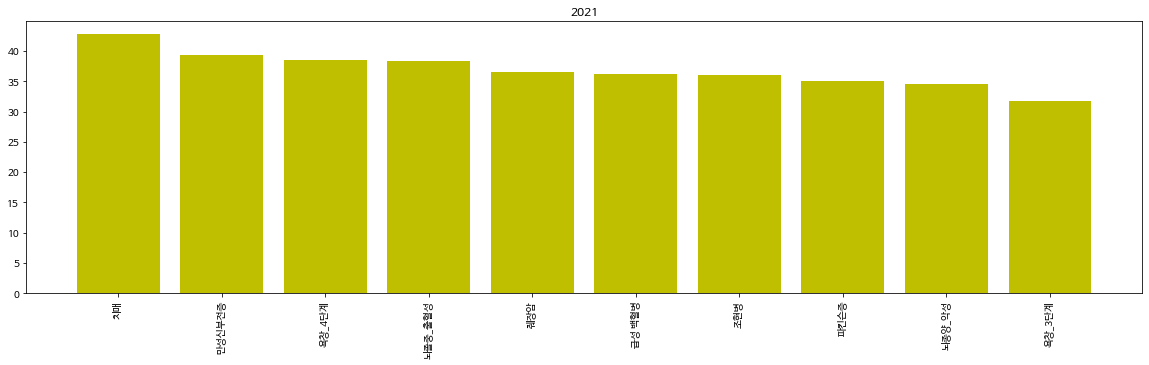

In [9]:
# 년도별 top10 질병

a = [df2017, df2018, df2019, df2020, df2021]
for i in a:
    plt.figure(figsize=(20,5))
    plt.title(i['연도'].iloc[0])
    plt.xticks(rotation=90)
    plt.bar(i['항목'], i['평균내원일수'], color='y')
    plt.show()
    

### top10 질병의 증감추세와 인구의 증감추세 비교(비율)

In [11]:
# 전체인원(성별구분=2), 년도별, 증감추이

df_alzheimer = df[(df['항목'] == '치매') & (df['성별구분'] == 2)]
df_alzheimer

,항목,성별구분,연령구분5세,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,본인부담금,연도
7044,치매,2,17,459421,23802729,2903054,1689763145,1237192578,452570567,2017
15346,치매,2,17,511931,25877792,3266019,1884475984,1382825490,501650494,2018
23648,치매,2,17,551845,26176829,3591464,1948071090,1434133965,513937125,2019
31950,치매,2,17,567433,26469368,3684115,2061243028,1525706459,535536569,2020
40252,치매,2,17,606247,25933412,3900526,2059425769,1528334415,531091354,2021


In [44]:
# 2021년 top10 질병명
df2021['항목']

40252         치매
34155     만성신부전증
36811     욕창_4단계
33393    뇌졸중_출혈성
40141        췌장암
39345     급성 백혈병
39877        조현병
40659       파킨슨증
33467     뇌종양_악성
36774     욕창_3단계
Name: 항목, dtype: object

년도별 top10질병 추세

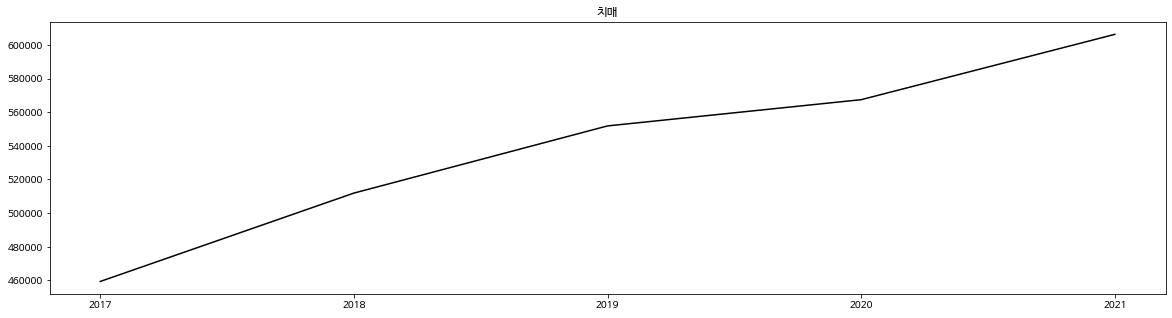

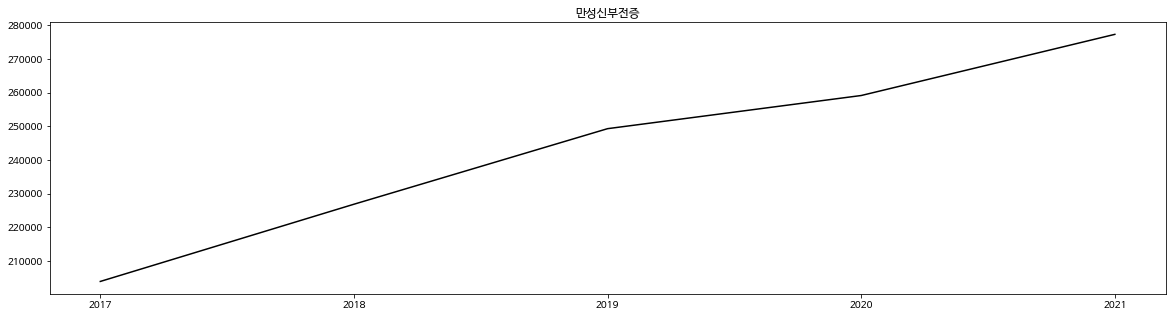

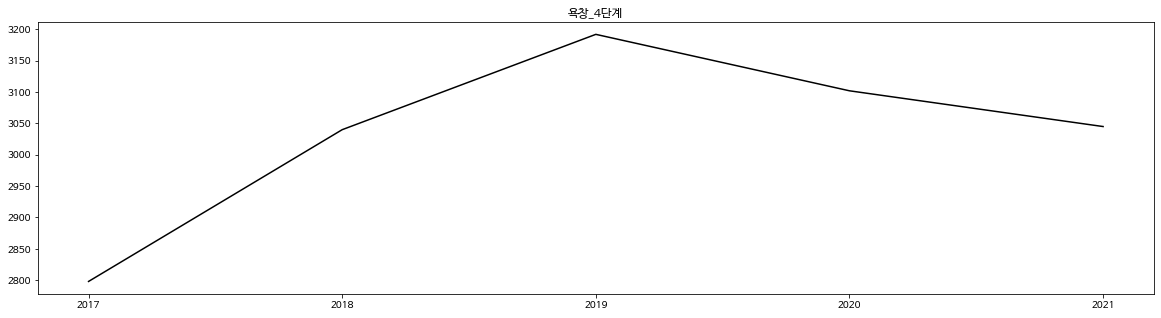

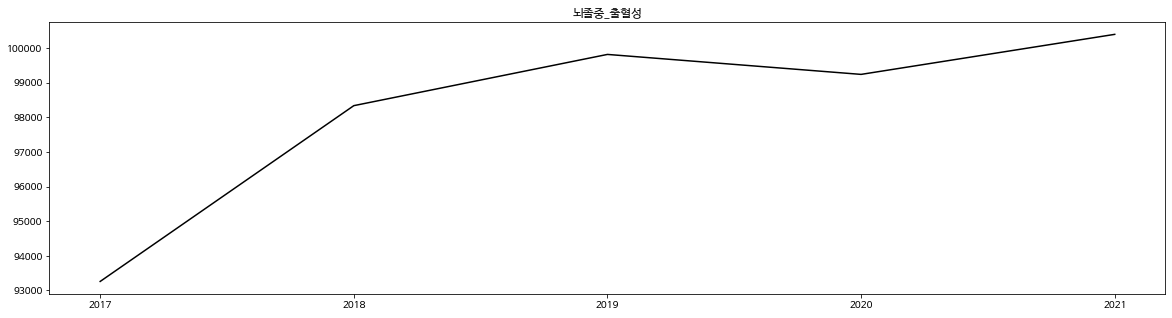

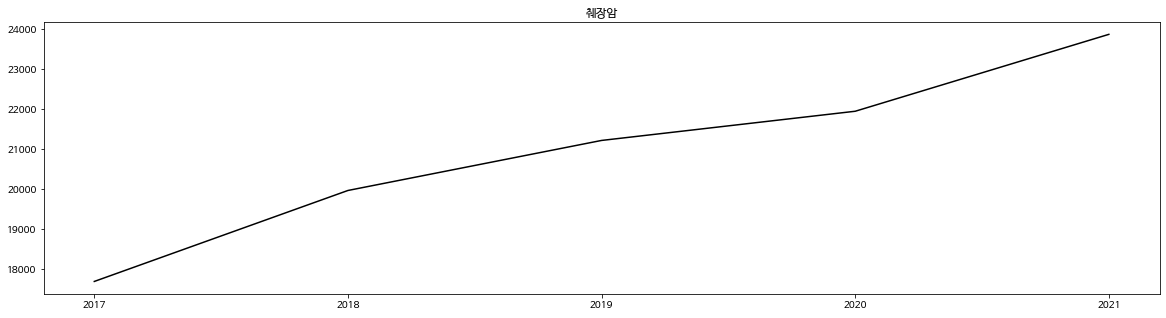

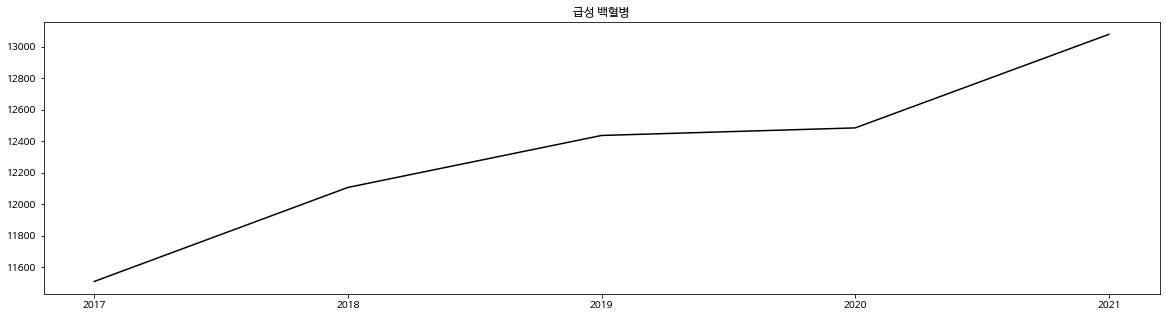

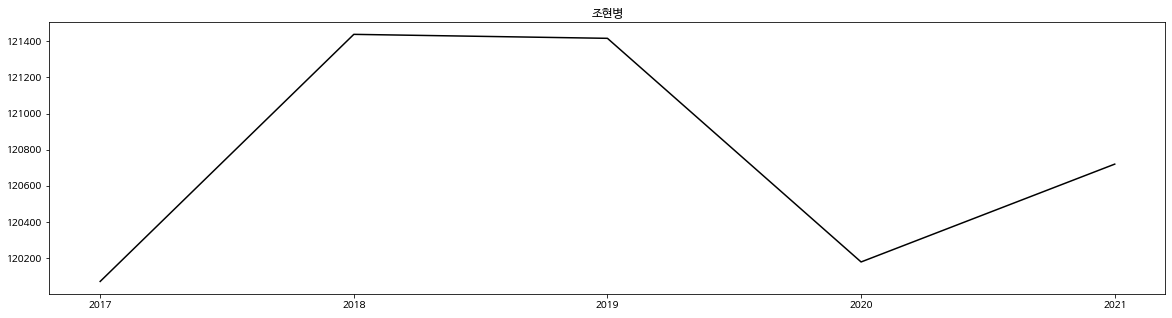

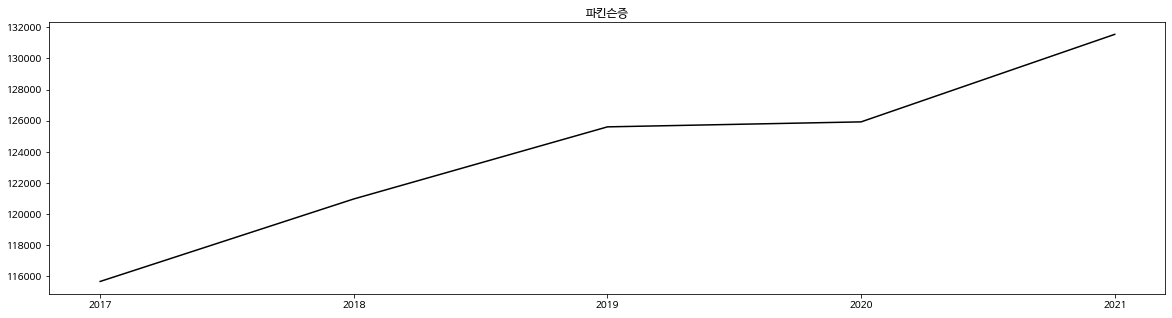

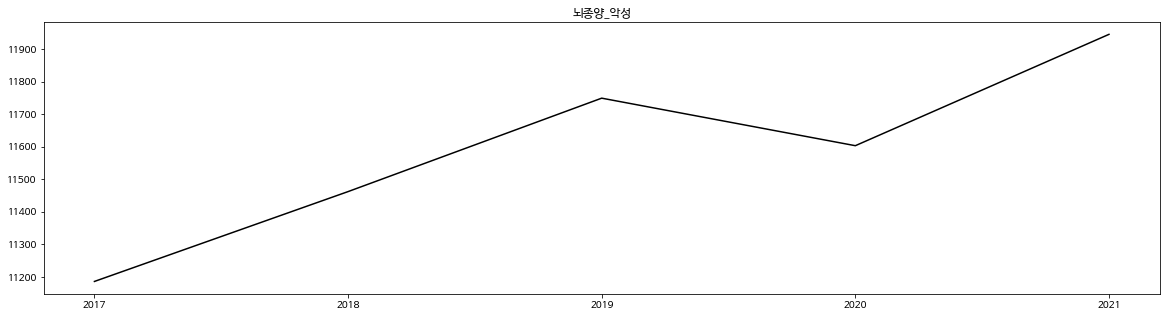

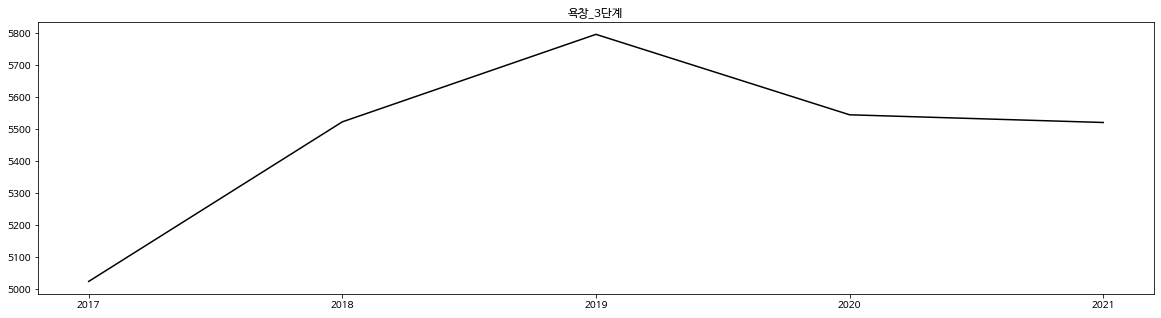

In [45]:
disease = df2021['항목']    # 모든 년도의 top10 항목은 동일하게 적용되어서, 최근 2021기준으로 항목을 정렬했음.

for i in disease:
    year = ['2017', '2018', '2019', '2020', '2021']
    plt.figure(figsize=(20,5))
    plt.title(i)
    df_disease = df[(df['항목'] == i) & (df['성별구분'] == 2)]
    plt.plot(year, df_disease['환자수'], color = 'black')
    # plt.xticks(rotation=90)
    plt.show()

### 우리나라 전체 인구 증감 그래프

In [16]:
all_p = pd.read_csv('/content/drive/MyDrive/산대특 Project/마지막프로젝트/마지막프로젝트/인구수 통계/population.csv', index_col=0)

In [17]:
all_p1 = all_p.reset_index()
all_p1.columns = (['통합', '인구통계'])

In [18]:
all_p1['연도'] = all_p1.통합.str.split('_').str[0]
all_p1['성별구분'] = all_p1.통합.str.split('_').str[1]
all_p1['연령'] = all_p1.통합.str.split('_').str[2]

In [19]:
all_p1.drop(columns=['통합'], inplace = True)

In [20]:
all_p1['연도'][all_p1['연도'] == '2017년'] = 2017
all_p1['연도'][all_p1['연도'] == '2018년'] = 2018
all_p1['연도'][all_p1['연도'] == '2019년'] = 2019
all_p1['연도'][all_p1['연도'] == '2020년'] = 2020
all_p1['연도'][all_p1['연도'] == '2021년'] = 2021

In [21]:
# 년도별 인구 증가 추이 >> 성별구분
pop = all_p1[(all_p1['성별구분'] == '계')]
pop

,인구통계,연도,성별구분,연령
0,51778544,2017,계,총인구수
37,51826059,2018,계,총인구수
74,51849861,2019,계,총인구수
111,51829023,2020,계,총인구수
148,51638809,2021,계,총인구수


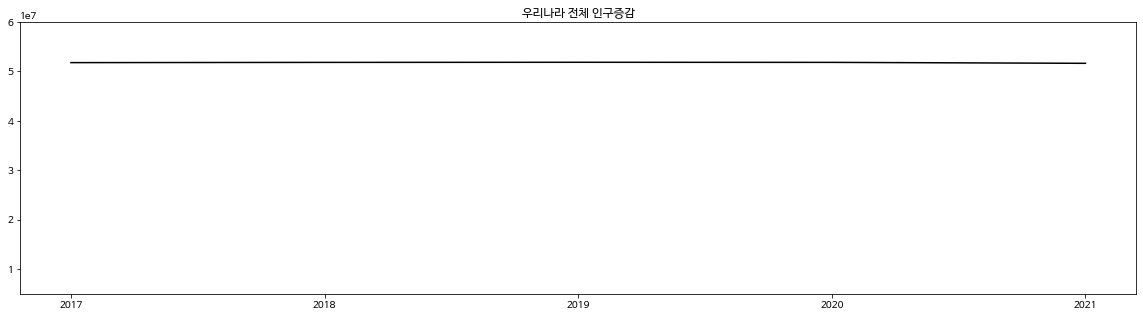

In [54]:
year = ['2017', '2018', '2019', '2020', '2021']
plt.figure(figsize=(20,5))
plt.plot(year, pop['인구통계'], color = 'black')
plt.title('우리나라 전체 인구증감')
plt.ylim(5000000, 60000000)
plt.show()

### 질병코드와 인구통계수 합치기

In [63]:
# top10 질병 list = ['치매', '만성신부전증', '욕창_4단계', '파킨슨증', '조현병', '뇌졸중_출혈성', '급성 백혈병','뇌종양_악성', '욕창_3단계', '췌장암']

# 병명 설정  (                   ▼ 이 부분 알고싶은 질병명으로 변경하면 됨.)
df_disease = df[(df['항목'] == '췌장암') & (df['성별구분'] == 2)]
df_disease

,항목,성별구분,연령구분5세,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,본인부담금,연도
6933,췌장암,2,17,17702,623088,229313,166582709,154556058,12026651,2017
15235,췌장암,2,17,19971,737257,274660,212765884,196008142,16757742,2018
23537,췌장암,2,17,21219,800218,300709,238463589,217325259,21138330,2019
31839,췌장암,2,17,21947,838328,332324,261589178,237371976,24217202,2020
40141,췌장암,2,17,23865,871314,369851,292370773,264647719,27723054,2021


In [159]:
pop = all_p1[(all_p1['성별구분'] == '계')]
pop

,인구통계,연도,성별구분,연령
0,51778544,2017,계,총인구수
37,51826059,2018,계,총인구수
74,51849861,2019,계,총인구수
111,51829023,2020,계,총인구수
148,51638809,2021,계,총인구수


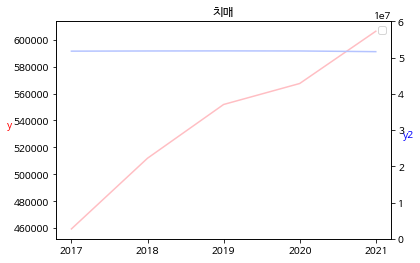

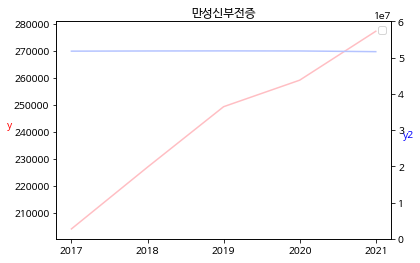

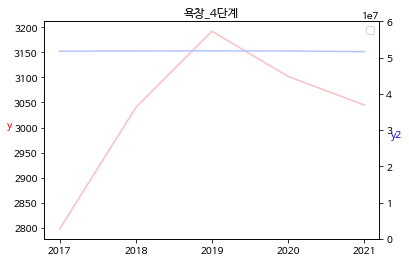

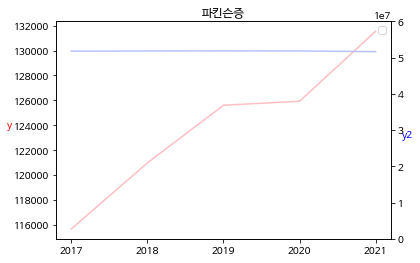

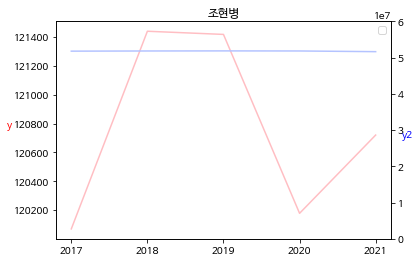

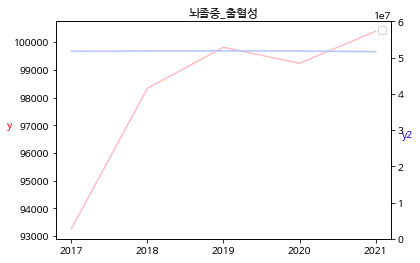

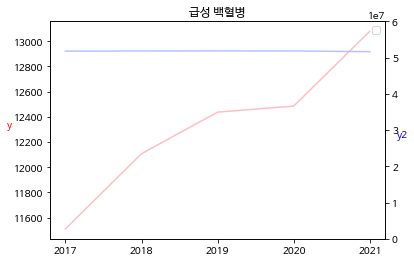

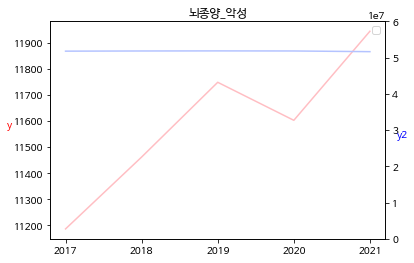

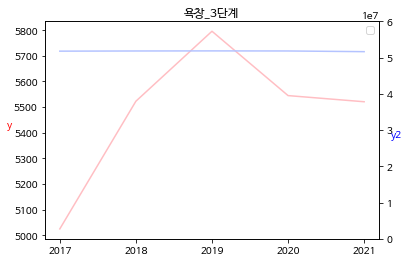

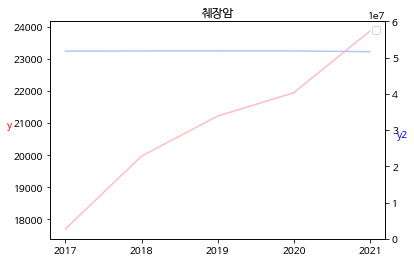

In [68]:
# # 병명 설정  (                 ▼ 이 부분 알고싶은 질병명으로 변경하면 됨.)
dis = ['치매', '만성신부전증', '욕창_4단계', '파킨슨증', '조현병', '뇌졸중_출혈성', '급성 백혈병','뇌종양_악성', '욕창_3단계', '췌장암']

for i in dis:
    df_disease = df[(df['항목'] == i) & (df['성별구분'] == 2)]
    year = ['2017', '2018', '2019', '2020', '2021']
    
    fig, ax1 = plt.subplots()
    ax1.plot(year, df_disease['환자수'], color = '#FFBEC3')
    # y축 라벨 및 범위 지정
    ax1.set_ylabel('y', color = 'red', rotation = 0)
    # ax1.set_ylim(0, 3)

    ax2 = ax1.twinx()
    ax2.plot(year, pop['인구통계'], color = '#B4C3FF')
    # y축 라벨 및 범위 지정
    ax2.set_ylabel('y2', color = 'blue', rotation = 0)
    ax2.set_ylim(0, 60000000)

    plt.title(i)
    plt.legend()
    plt.show()